In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler

In [2]:
#Membaca dan Menampilkan Dataset
#Menjadikan Kolom 'Lokasi' Sebagai Index
df = pd.read_excel('AllProvince 2.0.xlsx', index_col = 'Lokasi')
df

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
Lokasi,,,,,,,,,,,,,,,,,,,,,
Aceh,352281,1582391.00,44.92,380686,1772961.00,46.57,387803,1788738.00,46.12,419183,...,55.28,297058.38,1634639.60,55.03,271750.16,1509456.46,55.55,254287.38,1404234.82,55.22
Sumatera Utara,757674,3582302.00,47.47,757547,3607405.00,47.62,765099,3715084.00,48.56,742968,...,52.51,385405.00,2004142.51,52.00,411462.10,2088583.81,50.76,406109.49,2090475.17,51.40
Sumatera Barat,460497,2211248.00,48.49,461709,2279602.00,49.37,476422,2368390.00,49.71,487820,...,46.92,272391.95,1317209.38,48.36,271883.11,1373532.19,50.52,300564.77,1482468.79,49.32
Riau,156088,574864.00,36.83,145242,535788.00,36.89,144008,512152.00,35.56,118518,...,37.64,53062.35,217458.87,40.98,51054.04,213557.23,41.83,51914.14,205972.55,39.68
Jambi,153897,628828.00,40.86,157441,625868.00,41.07,149369,625166.00,41.85,153243,...,45.58,64412.26,298149.25,46.29,60539.59,277743.83,45.88,61236.64,275941.45,45.06
Sumatera Selatan,769478,3272449.00,42.53,784820,3384668.00,43.13,769725,3295246.00,42.81,800036,...,49.75,496241.65,2552443.19,51.44,513378.20,2775069.26,54.06,504143.03,2832773.92,56.19
Bengkulu,133629,516868.00,38.68,127936,502550.00,39.28,144448,581912.00,40.29,147680,...,45.66,55704.69,271117.19,48.67,57151.84,281610.09,49.27,57877.18,286684.43,49.53
Lampung,590608,2756517.00,47.54,606973,2940794.00,48.45,641876,3101455.00,48.32,638090,...,48.62,489573.23,2485452.78,50.77,518256.06,2688159.74,51.87,530108.09,2757898.19,52.03
Kepulauan Bangka Belitung,8180,22259.00,27.21,5299,15210.00,28.71,7995,22393.00,28.01,10227,...,32.13,18278.27,70496.25,38.57,15107.80,61425.07,40.66,15284.56,66468.89,43.49


In [3]:
#Memeriksa Missing Values
null_values = df.isnull()
print(null_values)
df.describe()

                               2010 (Luas Panen)  2010 (Produksi)   
Lokasi                                                              
Aceh                                       False            False  \
Sumatera Utara                             False            False   
Sumatera Barat                             False            False   
Riau                                       False            False   
Jambi                                      False            False   
Sumatera Selatan                           False            False   
Bengkulu                                   False            False   
Lampung                                    False            False   
Kepulauan Bangka Belitung                  False            False   
Kepulauan Riau                             False            False   
Daerah Khusus Ibukota Jakarta              False            False   
Jawa Barat                                 False            False   
Jawa Tengah                       

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
count,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,...,34.000000,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,34.000000,3.400000e+01,3.400000e+01,34.000000
mean,3.925107e+05,1.957655e+06,43.811176,3.901514e+05,1.933534e+06,43.910882,3.965806e+05,2.009055e+06,44.762941,4.074690e+05,...,44.008824,3.062294e+05,1.581654e+06,45.946471,3.074235e+05,1.598189e+06,45.882647,3.003167e+05,1.587174e+06,46.209706
std,5.463519e+05,3.120571e+06,9.121808,5.265327e+05,2.952558e+06,8.708731,5.333024e+05,3.062643e+06,9.280906,5.538186e+05,...,8.716140,4.775165e+05,2.705818e+06,8.205644,4.807524e+05,2.710551e+06,8.342197,4.681626e+05,2.651196e+06,8.394783
min,3.960000e+02,1.246000e+03,26.270000,3.990000e+02,1.259630e+03,28.490000,3.770000e+02,1.323300e+03,28.010000,3.790000e+02,...,28.560000,2.701600e+02,8.550100e+02,30.280000,1.794800e+02,5.069100e+02,28.240000,1.152700e+02,3.240100e+02,28.110000
25%,5.361275e+04,2.750645e+05,37.235000,5.869500e+04,2.757602e+05,37.487500,5.934375e+04,2.874238e+05,37.627500,6.546925e+04,...,37.862500,5.372293e+04,2.303452e+05,40.222500,5.006994e+04,2.200243e+05,39.390000,5.018639e+04,2.112224e+05,40.980000
50%,1.549925e+05,6.396220e+05,43.725000,1.550130e+05,6.180520e+05,44.850000,1.511405e+05,7.569395e+05,43.760000,1.562545e+05,...,45.620000,1.166881e+05,4.556093e+05,47.855000,1.116239e+05,4.162357e+05,47.430000,1.071039e+05,5.067605e+05,47.740000
75%,4.524880e+05,1.996558e+06,49.270000,4.573700e+05,2.060131e+06,49.430000,4.642660e+05,2.107228e+06,49.705000,4.708082e+05,...,49.735000,2.918468e+05,1.557325e+06,51.745000,2.718499e+05,1.495329e+06,51.812500,2.973016e+05,1.524520e+06,51.872500
max,2.037657e+06,1.173707e+07,59.290000,1.964426e+06,1.164387e+07,59.220000,1.975719e+06,1.127186e+07,61.880000,2.037021e+06,...,58.490000,1.747481e+06,9.789588e+06,58.830000,1.693211e+06,9.526516e+06,60.590000,1.698083e+06,9.710661e+06,62.070000


In [4]:
#Menampilkan Informasi mengenai Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Aceh to Papua
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   2010 (Luas Panen)     34 non-null     int64  
 1   2010 (Produksi)       34 non-null     float64
 2   2010 (Produktivitas)  34 non-null     float64
 3   2011 (Luas Panen)     34 non-null     int64  
 4   2011 (Produksi)       34 non-null     float64
 5   2011 (Produktivitas)  34 non-null     float64
 6   2012 (Luas Panen)     34 non-null     int64  
 7   2012 (Produksi)       34 non-null     float64
 8   2012 (Produktivitas)  34 non-null     float64
 9   2013 (Luas Panen)     34 non-null     int64  
 10  2013 (Produksi)       34 non-null     float64
 11  2013 (Produktivitas)  34 non-null     float64
 12  2014 (Luas Panen)     34 non-null     int64  
 13  2014 (Produksi)       34 non-null     int64  
 14  2014 (Produktivitas)  34 non-null     float64
 15  2015 (Luas Panen)     34

Tidak ada missing values pada dataset

In [5]:
#Standaridasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.values)

# Mengubah hasil scaled_data (array) kembali menjadi DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

# Memperbarui DataFrame asli
df.update(df_scaled)

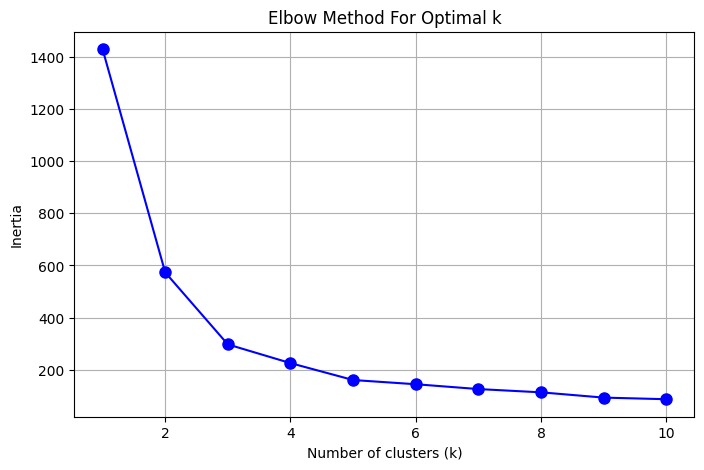

In [6]:
#Menentukan Nilai k Terbaik Menggunakan Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

#Melakukan Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [7]:
#Melakukan K-Means Clustering
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=500, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)
df

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas),Cluster
Lokasi,,,,,,,,,,,,,,,,,,,,,
Aceh,-0.074741,-0.122063,0.123385,-0.018247,-0.055202,0.309931,-0.016707,-0.073019,0.148419,0.021469,...,-0.019495,0.019877,1.123633,-0.075319,-0.033228,1.176277,-0.099798,-0.070040,1.089462,0
Sumatera Utara,0.678418,0.528454,0.407139,0.708257,0.575448,0.432313,0.701404,0.565422,0.415278,0.614902,...,0.168300,0.158489,0.748822,0.219662,0.183642,0.593453,0.229373,0.192694,0.627574,0
Sumatera Barat,0.126308,0.082487,0.520641,0.137947,0.118972,0.636283,0.151963,0.119093,0.541052,0.147267,...,-0.071927,-0.099202,0.298554,-0.075038,-0.084129,0.564251,0.000538,-0.040087,0.376075,0
Riau,-0.439237,-0.449785,-0.776837,-0.472131,-0.480521,-0.818313,-0.480723,-0.496112,-1.006512,-0.529589,...,-0.538147,-0.511753,-0.614353,-0.541287,-0.518512,-0.493107,-0.538570,-0.528808,-0.789526,0
Jambi,-0.443308,-0.432232,-0.328395,-0.448614,-0.449553,-0.331117,-0.470520,-0.458656,-0.318584,-0.465945,...,-0.514021,-0.481484,0.042495,-0.521259,-0.494476,-0.000322,-0.518357,-0.502019,-0.139014,0
Sumatera Selatan,0.700348,0.427668,-0.142564,0.760834,0.498875,-0.091015,0.710208,0.426277,-0.213590,0.719497,...,0.403902,0.364174,0.679550,0.434843,0.440715,0.994981,0.441922,0.476891,1.206747,0
Bengkulu,-0.480963,-0.468649,-0.570977,-0.505493,-0.491948,-0.539748,-0.479886,-0.472992,-0.489199,-0.476141,...,-0.532531,-0.491624,0.336901,-0.528412,-0.493028,0.412157,-0.525641,-0.497906,0.401467,0
Lampung,0.368034,0.259849,0.414929,0.417984,0.346279,0.529053,0.466873,0.362049,0.389030,0.422682,...,0.389727,0.339044,0.596671,0.445142,0.408169,0.728512,0.498218,0.448224,0.703749,0
Kepulauan Bangka Belitung,-0.714028,-0.629532,-1.847313,-0.741910,-0.659487,-1.771725,-0.739598,-0.658431,-1.832243,-0.728065,...,-0.612087,-0.566883,-0.912470,-0.617182,-0.575482,-0.635467,-0.617987,-0.582218,-0.328848,0


In [8]:
#Menampilkan Distribusi C0 dan C1
cluster_distribution = df.groupby('Cluster').size()
cluster_distribution

Cluster
0    30
1     4
dtype: int64

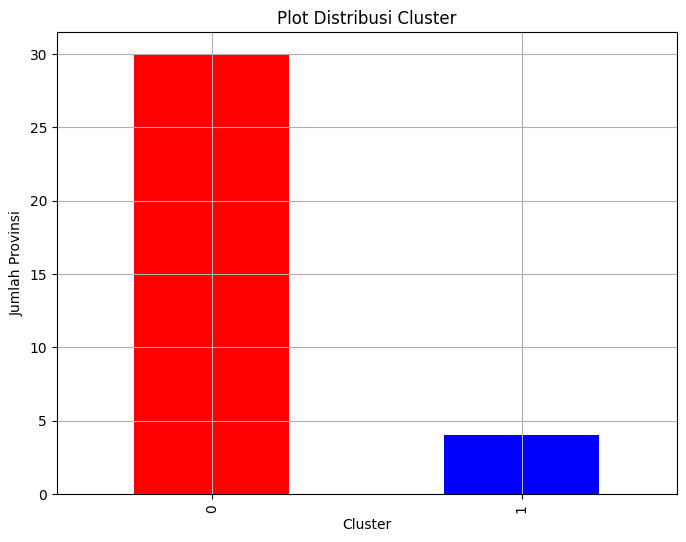

In [9]:
# Visualisasi distribusi tiap cluster
plt.figure(figsize=(8,6))
cluster_distribution.plot(kind='bar', color=['red', 'blue', 'orange'])
plt.title('Plot Distribusi Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Provinsi')
plt.grid(True)
plt.show()

In [10]:
#Menampilkan Rata-rata Setiap Cluster
cluster_means = df.groupby('Cluster').mean()
cluster_means

,2010 (Luas Panen),2010 (Produksi),2010 (Produktivitas),2011 (Luas Panen),2011 (Produksi),2011 (Produktivitas),2012 (Luas Panen),2012 (Produksi),2012 (Produktivitas),2013 (Luas Panen),...,2020 (Produktivitas),2021 (Luas Panen),2021 (Produksi),2021 (Produktivitas),2022 (Luas Panen),2022 (Produksi),2022 (Produktivitas),2023 (Luas Panen),2023 (Produksi),2023 (Produktivitas)
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.320111,-0.325962,-0.175131,-0.317704,-0.324186,-0.169689,-0.321224,-0.328472,-0.182675,-0.321692,...,-0.165462,-0.340711,-0.341193,-0.154230,-0.341524,-0.341265,-0.149496,-0.339025,-0.337715,-0.144093
1,2.400831,2.444713,1.313482,2.382780,2.431398,1.272668,2.409180,2.463542,1.370065,2.412693,...,1.240965,2.555334,2.558947,1.156723,2.561428,2.559485,1.121219,2.542690,2.532862,1.080696


0 = Rendah <br>1 = Tinggi

In [11]:
#Menampilkan Daftar Cluster
df['Cluster']

Lokasi
Aceh                             0
Sumatera Utara                   0
Sumatera Barat                   0
Riau                             0
Jambi                            0
Sumatera Selatan                 0
Bengkulu                         0
Lampung                          0
Kepulauan Bangka Belitung        0
Kepulauan Riau                   0
Daerah Khusus Ibukota Jakarta    0
Jawa Barat                       1
Jawa Tengah                      1
Daerah Istimewa Yogyakarta       0
Jawa Timur                       1
Banten                           0
Bali                             0
Nusa Tenggara Barat              0
Nusa Tenggara Timur              0
Kalimantan Barat                 0
Kalimantan Tengah                0
Kalimantan Selatan               0
Kalimantan Timur                 0
Kalimantan Utara                 0
Sulawesi Utara                   0
Sulawesi Tengah                  0
Sulawesi Selatan                 1
Sulawesi Tenggara                0
Gorontalo    

In [12]:
optimal_k = 2

In [13]:
# 5. Menghitung Silhouette Score
from sklearn.metrics import silhouette_score 
features = df.drop(columns=['Cluster'])  # Mengambil fitur tanpa kolom 'Cluster'
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f"Silhouette Score untuk K={optimal_k}: {silhouette_avg}")

Silhouette Score untuk K=2: 0.6427965732193394


Silhouette Score untuk K=2: 0.6427965732193394 <br> Silhouette Score untuk K=3: 0.42647663291559773 <br> Silhouette Score untuk K=4: 0.3804975275359374


In [14]:
from sklearn.metrics import davies_bouldin_score

# Data dan model harus konsisten dengan kode kedua
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)  # Data yang telah distandarisasi
cluster_labels = kmeans.labels_

# Menghitung Davies-Bouldin Index
dbi = davies_bouldin_score(scaled_data, cluster_labels)
print(f"Davies-Bouldin Index untuk K=2: {dbi}")

Davies-Bouldin Index untuk K=2: 0.3618860533098534


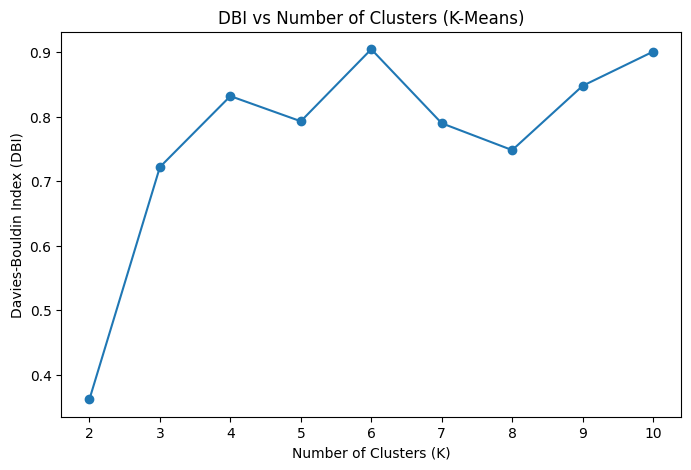

DBI untuk K=2: 0.3618860533098534
DBI untuk K=3: 0.7219191491996765
DBI untuk K=4: 0.8319216072519837
DBI untuk K=5: 0.7928653931729561
DBI untuk K=6: 0.904601666296709
DBI untuk K=7: 0.7898079148307584
DBI untuk K=8: 0.7481572949295611
DBI untuk K=9: 0.8478474441469244
DBI untuk K=10: 0.9008522328455602


In [15]:
# Menghitung Davies-Bouldin Index untuk berbagai jumlah K
cluster_range = range(2, 11)  # Mencoba nilai K dari 2 hingga 10
dbi_values = []  # Menyimpan nilai DBI untuk setiap K

# Loop untuk menghitung DBI untuk setiap jumlah cluster (K)
for k in cluster_range:
    # Melakukan K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Data yang telah distandarisasi
    
    # Menyimpan label cluster untuk setiap data point
    cluster_labels = kmeans.labels_
    
    # Menghitung Davies-Bouldin Index
    dbi = davies_bouldin_score(scaled_data, cluster_labels)
    dbi_values.append(dbi)

# Plot DBI untuk berbagai jumlah cluster
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index (DBI)")
plt.title("DBI vs Number of Clusters (K-Means)")
plt.xticks(cluster_range)
plt.show()

# Menampilkan nilai DBI untuk setiap K
for k, dbi in zip(cluster_range, dbi_values):
    print(f"DBI untuk K={k}: {dbi}")


C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_14452\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Cluster'] = df['Cluster']
C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_14452\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Cluster'] = df['Cluster']
C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_14452\1505300114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

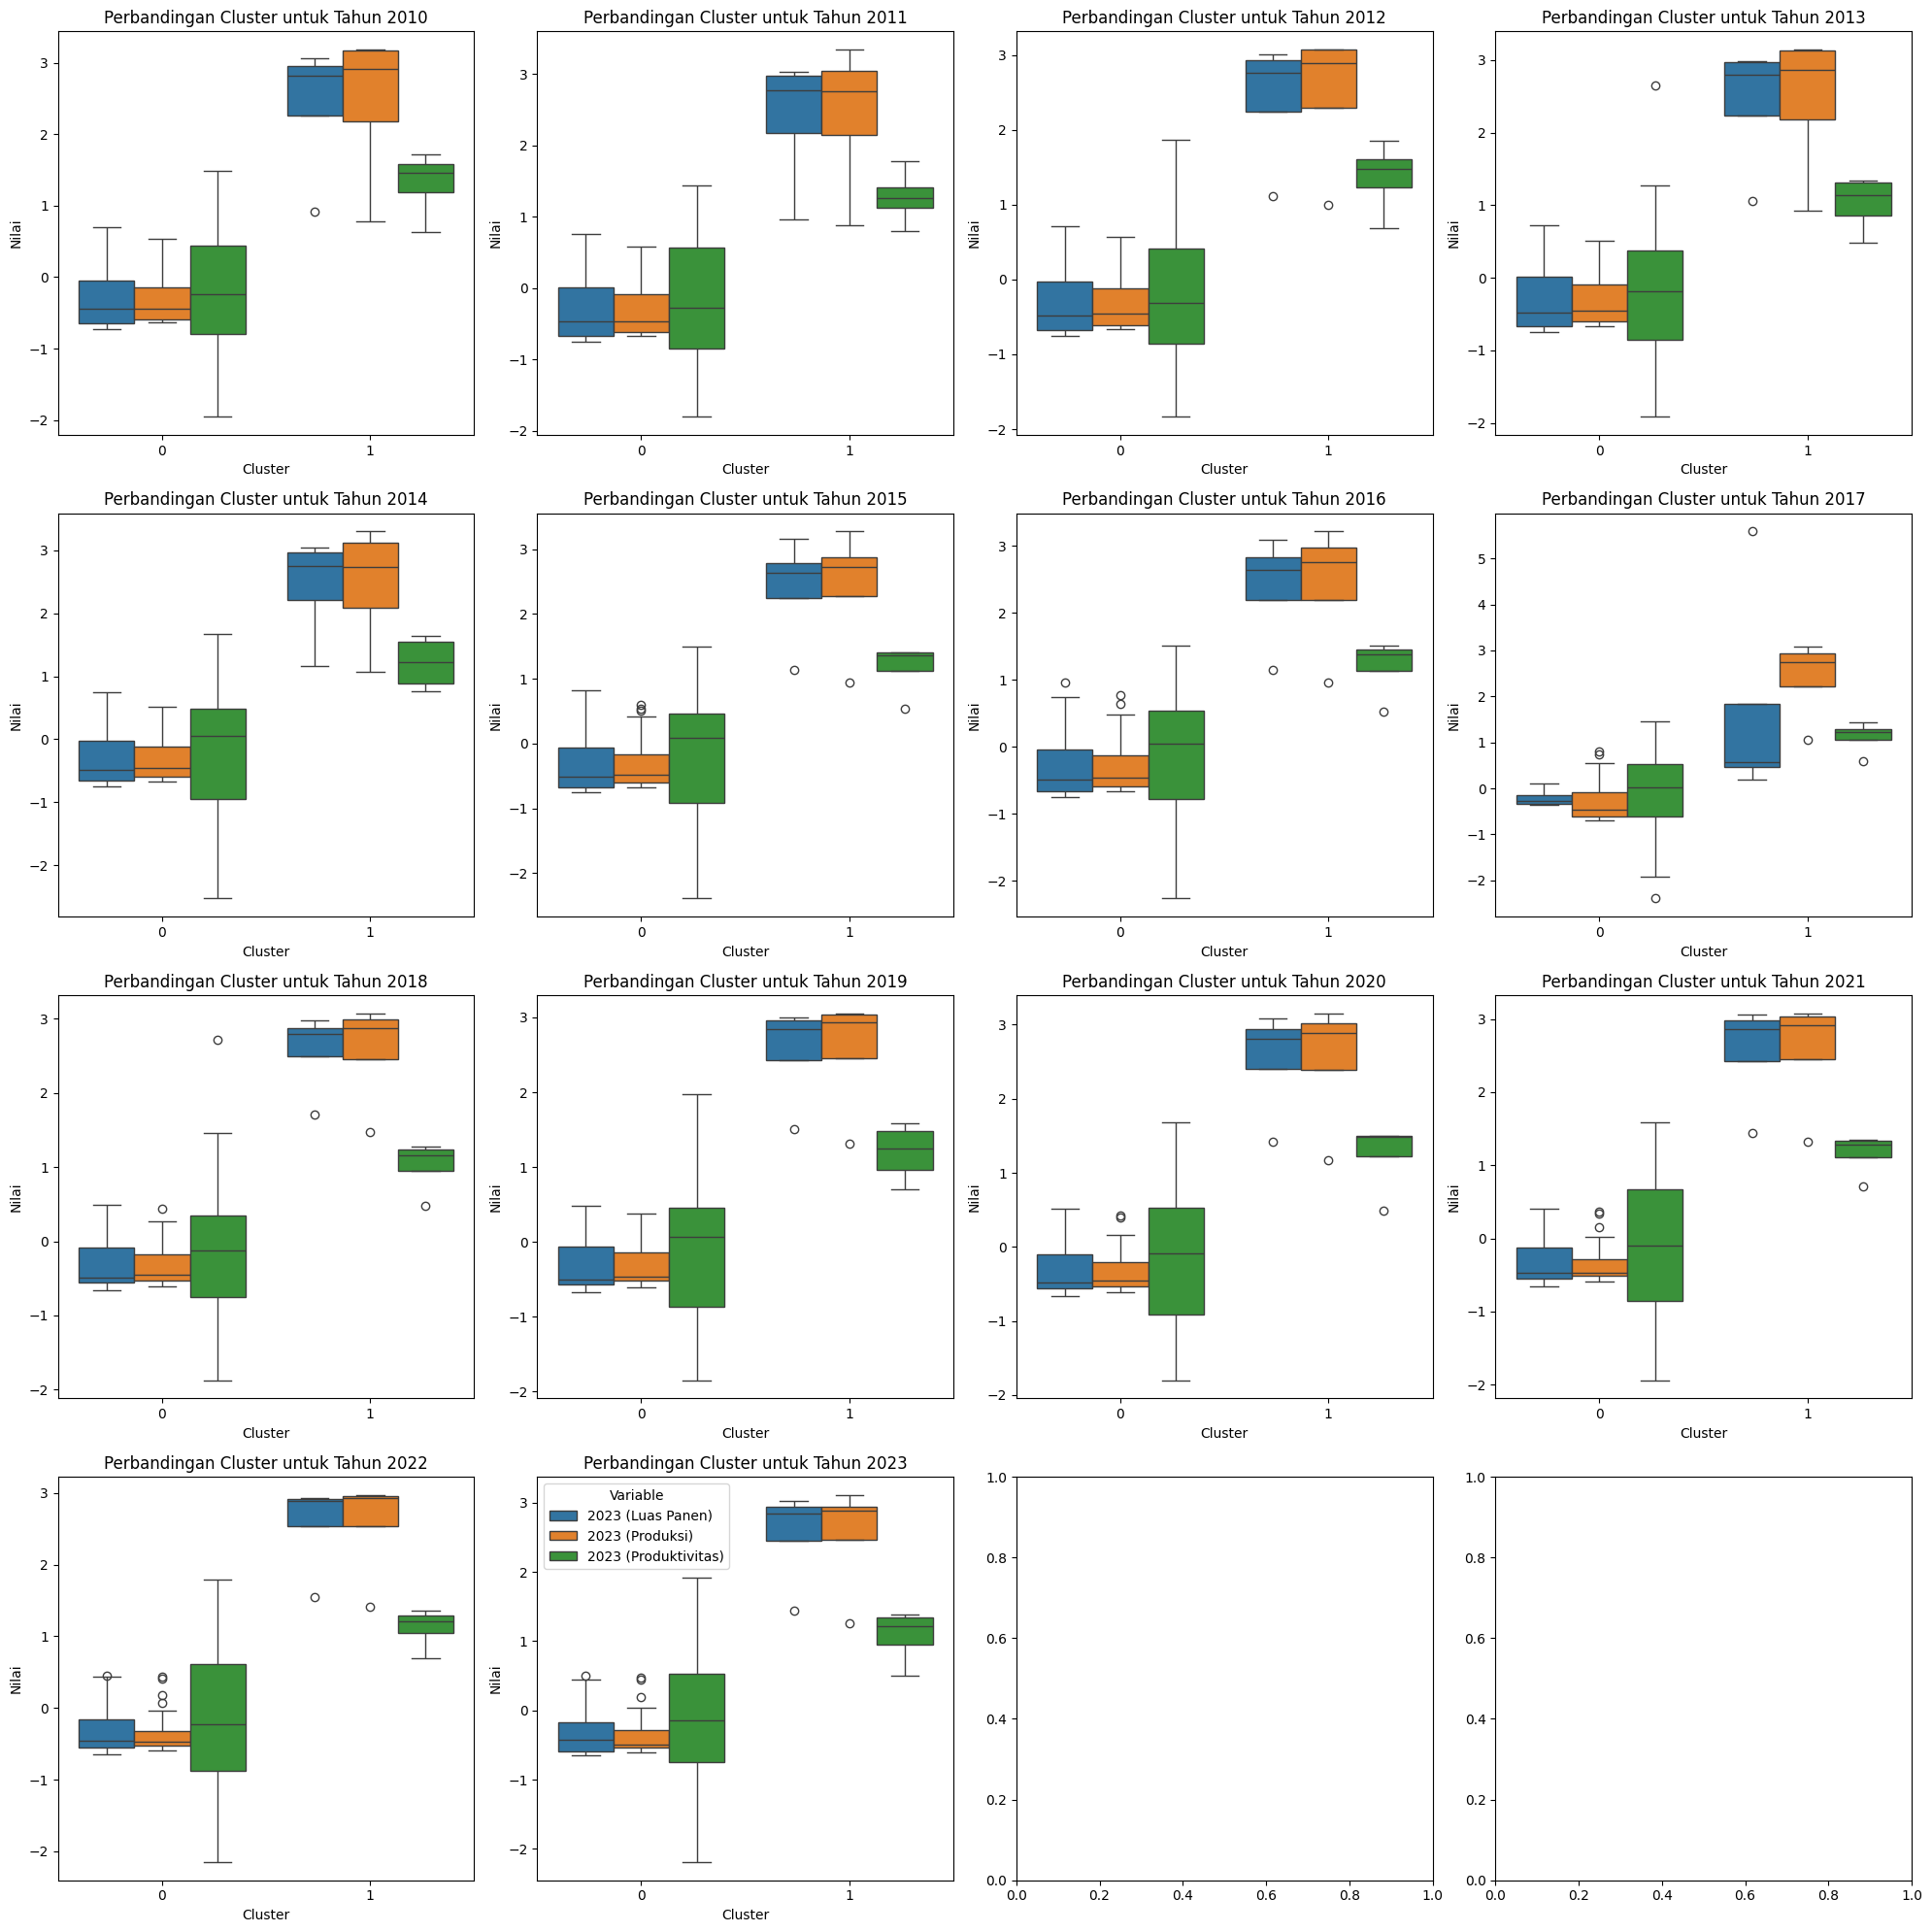

In [16]:
#Melakukan Subplot
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar tahun yang ingin ditampilkan
years = list(range(2010, 2024))  # Tahun dari 2010 hingga 2023
num_years = len(years)

# Mengatur ukuran plot dan jumlah subplot
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Sesuaikan jumlah baris dan kolom sesuai kebutuhan
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter kolom untuk tahun tertentu
    data_year = df.filter(like=str(year), axis=1)
    data_year['Cluster'] = df['Cluster']
    
    # Reshape data untuk plotting
    data_year_melted = data_year.melt(id_vars='Cluster', var_name='Variable', value_name='Value')
    
    # Plot box plot pada subplot
    sns.boxplot(x='Cluster', y='Value', hue='Variable', data=data_year_melted, ax=axes[i])
    axes[i].set_title(f'Perbandingan Cluster untuk Tahun {year}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Nilai')

    # Menyembunyikan legend di setiap subplot, kecuali yang terakhir
    if i < num_years - 1:
        axes[i].get_legend().remove()

# Mengatur layout agar lebih rapi
plt.tight_layout()
plt.show()

In [17]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: geopandas in c:\python310\lib\site-packages (1.0.1)




[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


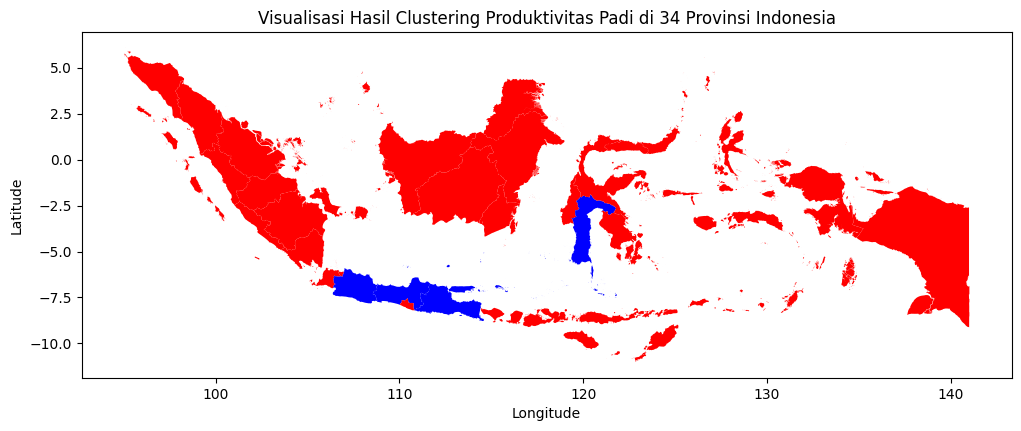

In [18]:
# Import Library
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Muat shapefile Indonesia
gdf = gpd.read_file("gadm41_IDN_1.shp")# Mengembalikan index ke kolom biasa
df_reset = df.reset_index()  # df adalah DataFrame asli Anda yang memiliki kolom 'Lokasi' sebagai index

# Pastikan DataFrame 'df' memiliki nama provinsi yang sama dengan data shapefile
# Hanya ambil kolom Cluster dan Provinsi
data_clustering = df[['Cluster']].reset_index().rename(columns={'Lokasi': 'provinsi'})

# Agregasi data ke level provinsi
gdf_provinsi = gdf.dissolve(by='NAME_1')  # Menggabungkan data kabupaten ke provinsi
gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_1', right_on='provinsi', how='left')


# Kamus penyesuaian nama provinsi
kamus_penyesuaian = {
    "Daerah Khusus Ibukota Jakarta": "Jakarta Raya",
    "Kepulauan Bangka Belitung": "Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "Yogyakarta",
}

# Terapkan kamus untuk mengganti nama provinsi di df
df_reset['Lokasi'] = df_reset['Lokasi'].replace(kamus_penyesuaian)

# Ganti 'Lokasi' menjadi 'provinsi' untuk konsistensi
data_clustering = df_reset[['Lokasi', 'Cluster']].rename(columns={'Lokasi': 'provinsi'})

# Menggabungkan data ke level provinsi
gdf_provinsi = gdf.dissolve(by='NAME_1')  # Menggabungkan data kabupaten ke provinsi
gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_1', right_on='provinsi', how='left')

# Atur warna berdasarkan cluster
color_map = {0: 'red', 1: 'blue'}
gdf_provinsi['color'] = gdf_provinsi['Cluster'].map(color_map)
gdf_provinsi['color'] = gdf_provinsi['color'].fillna('lightgrey')  # Warna abu-abu untuk provinsi tanpa data

# Visualisasikan peta dengan warna cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_provinsi.plot(ax=ax, color=gdf_provinsi['color'], legend=True)

# Tambahkan judul dan label
plt.title("Visualisasi Hasil Clustering Produktivitas Padi di 34 Provinsi Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


C:\Users\YOSIA AMADEUS\AppData\Local\Temp\ipykernel_14452\1627503065.py:49: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_provinsi.geometry.centroid.x, gdf_provinsi.geometry.centroid.y, gdf_provinsi['provinsi']):


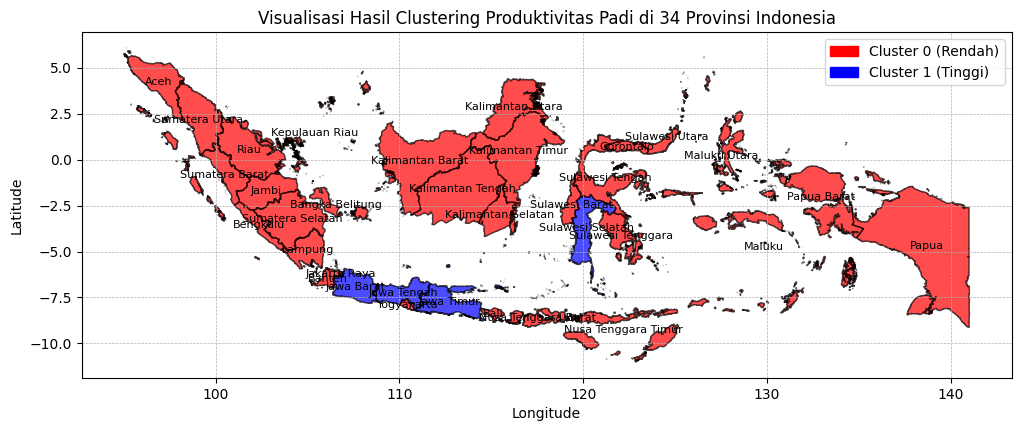

In [19]:
# Import Library
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Muat shapefile Indonesia
gdf = gpd.read_file("gadm41_IDN_1.shp")# Mengembalikan index ke kolom biasa
df_reset = df.reset_index()  # df adalah DataFrame asli Anda yang memiliki kolom 'Lokasi' sebagai index

# Pastikan DataFrame 'df' memiliki nama provinsi yang sama dengan data shapefile
# Hanya ambil kolom Cluster dan Provinsi
data_clustering = df[['Cluster']].reset_index().rename(columns={'Lokasi': 'provinsi'})

# Agregasi data ke level provinsi
gdf_provinsi = gdf.dissolve(by='NAME_1')  # Menggabungkan data kabupaten ke provinsi
gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_1', right_on='provinsi', how='left')# Mengembalikan index ke kolom biasa
df_reset = df.reset_index()  # df adalah DataFrame asli Anda yang memiliki kolom 'Lokasi' sebagai index

# Kamus penyesuaian nama provinsi
kamus_penyesuaian = {
    "Daerah Khusus Ibukota Jakarta": "Jakarta Raya",
    "Kepulauan Bangka Belitung": "Bangka Belitung",
    "Daerah Istimewa Yogyakarta": "Yogyakarta",
}

# Terapkan kamus untuk mengganti nama provinsi di df
df_reset['Lokasi'] = df_reset['Lokasi'].replace(kamus_penyesuaian)

# Ganti 'Lokasi' menjadi 'provinsi' untuk konsistensi
data_clustering = df_reset[['Lokasi', 'Cluster']].rename(columns={'Lokasi': 'provinsi'})

# Menggabungkan data ke level provinsi
gdf_provinsi = gdf.dissolve(by='NAME_1')  # Menggabungkan data kabupaten ke provinsi
gdf_provinsi = gdf_provinsi.merge(data_clustering, left_on='NAME_1', right_on='provinsi', how='left')

# Atur warna berdasarkan cluster
color_map = {0: 'red', 1: 'blue'}
gdf_provinsi['color'] = gdf_provinsi['Cluster'].map(color_map)
gdf_provinsi['color'] = gdf_provinsi['color'].fillna('lightgrey')  # Warna abu-abu untuk provinsi tanpa data

# Visualisasikan peta dengan warna cluster
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_provinsi.plot(ax=ax, color=gdf_provinsi['color'], alpha=0.7, edgecolor='black')

# Tambahkan grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Tambahkan label provinsi
for x, y, label in zip(gdf_provinsi.geometry.centroid.x, gdf_provinsi.geometry.centroid.y, gdf_provinsi['provinsi']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Menambahkan legenda kustom
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Cluster 0 (Rendah)')
blue_patch = mpatches.Patch(color='blue', label='Cluster 1 (Tinggi)')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')

# Tambahkan judul dan label
plt.title("Visualisasi Hasil Clustering Produktivitas Padi di 34 Provinsi Indonesia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()